# Sales Analysis

### Import necessary libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Task 1: Merge the 12 months sales data into a single CSV file

In [2]:
df = pd.read_csv(r'C:\Users\Chief\Documents\Project\SalesAnalysis\Sales_Data\Sales_April_2019.csv')

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# Create a list of all the files in the folder Sales_data

files = [file for file in os.listdir('./Sales_Data')] #./ start from the current director 

# List of all the files in the files list
for file in files:
    print(file)
    
all_month_data = pd.DataFrame() # Empty Dataframe

for file in files:
    df = pd.read_csv("./Sales_Data/" + file) # Reading all the csv files
    all_month_data = pd.concat([all_month_data, df])

# Saving concated data of all the month in a single csv File called All Data
all_month_data.to_csv('all_data.csv', index = False)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


#### Read the updated Dataframe 

In [5]:
all_data = pd.read_csv('all_data.csv')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning the Data

In [7]:
# Drop rows of NAN

print(all_data.isnull().sum()) # Counting the number of nan values in the columns

all_data = all_data.dropna(how = 'all') # If all the values in a row is NA then drop it

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [8]:
# Find OR and Delete it

temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or'] # Finding the Or string in Order Date
temp_df

# data which doesn't have string Or
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [9]:
# Convert Columns to Correct Data type

all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32') # Conve
all_data['Price Each'] = all_data['Price Each'].astype('float64')


### Augment data with addition Columns

#### Adding Month Column

In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2] # Take the first two characters of Order Data as the month
all_data['Month'] = all_data['Month'].astype('int32') # Convert the month column to integer

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Adding Sales Column

In [11]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add City Column

In [12]:
# Splitting data on basis of ',' and grab the second index
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]  # The second split is for removing the zip code

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### What was the best month for sales? How much was earned that month?

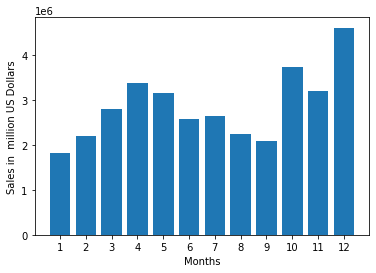

In [14]:
results = all_data.groupby('Month').sum() # Summing the data by grouping them month wise

months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in  million US Dollars')
plt.show()

Decembers has the highest sales while January has the lowest sales. Christmas may have played an important role in this.

### Which city has the highest number of sales?

Text(0, 0.5, 'Sales in USD($)')

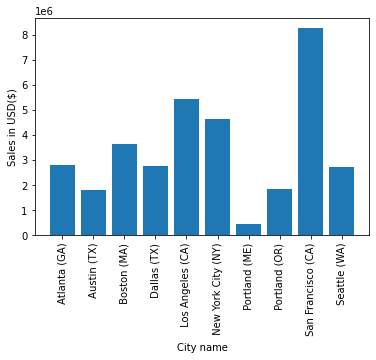

In [16]:
results = all_data.groupby('City').sum()

# List comprehension to have cities in the same order as in results
city = [city for city, df in all_data.groupby('City')]

plt.bar(city, results['Sales'])
plt.xlabel('City name')
plt.xticks(city, rotation = 'vertical')
plt.ylabel("Sales in USD($)")

San Francisco has the highest sales. This maybe because as this company is an electronic sales company, it is mostly used in silicon valley or maybe the advertisement is good for that region

### What time should we display the advertisements to maximize likelihood of customers buying the product?

In [15]:
# Converting the order date column to Date Time format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


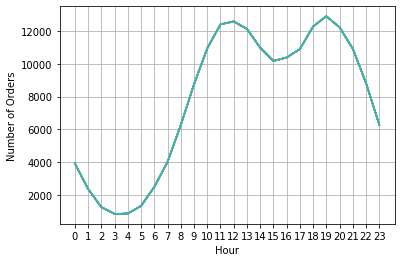

In [16]:
# List of hour in the same sequence as in the dataframe
hours = [hour for hour, df in all_data.groupby(['Hour'])]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.grid() # For grid lines
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

Peak hours: 12 am and 7pm. Hence 11am and 6pm looks like the best time to advertise.

### What products are most often sold together?

Orders with same Order ID are ordered together

apply implicitly passes all the columns for each group as a DataFrame to the custom function.
while transform passes each column for each group individually as a Series to the custom function.
Output:
The custom function passed to apply can return a scalar, or a Series or DataFrame (or numpy array or even list).
The custom function passed to transform must return a sequence (a one dimensional Series, array or list) the same length as the group
.Apply didn't work

In [18]:
all_data.head()

#Creating data frame which only has rows which have atleast more than one occurance of same Order ID
df = all_data[all_data['Order ID'].duplicated(keep = False)] # Keeping all occurance of the duplicates
df.head(10)

# Creating a new column which will have all the products purchased grouped in a single ordered
df['Grouped'] =  df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) #.apply didn't work
df.head()

# Dropping the duplicates
df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

C:\Users\Chief\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [19]:
# Referenced : https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',') # Creating the grouped items into a sublist so as to be able to use the stackoverflow reference
    count.update(Counter(combinations(row_list, 2))) # Counting the occurance of pairs

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

Phones and their charging cables are often bought together especially Iphone. 
Further analysis can be done using Associative Rule Mining.

### What product sold the most? Why do you think it sold the most??

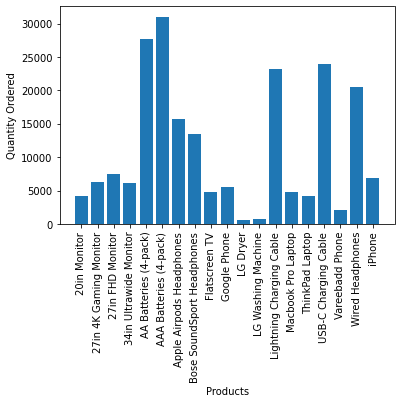

In [31]:
all_data.head()

all_data.groupby('Product')['Quantity Ordered'].sum()
quantity_ordered = all_data.groupby('Product')['Quantity Ordered'].sum()

product = [product for product, df in all_data.groupby('Product')]
plt.bar(product,quantity_ordered)
plt.xlabel("Products")
plt.ylabel('Quantity Ordered')
plt.xticks(rotation = 'vertical')
plt.show()


The AAA Batteries are sold the most. Because it's one of the most cheapest item it looks like that could be the reason

#### To prove the above Hypothesis

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\Chief\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


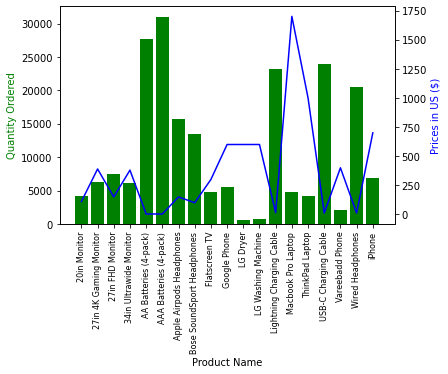

In [35]:
prices = all_data.groupby('Product')['Price Each'].mean()
print(prices)

# Superimpose the prices on the previous Bar Chart. https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantity_ordered, color = 'g')
ax2.plot(product, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Prices in US ($)', color='b')
ax1.set_xticklabels(product, rotation = 'vertical', size = 8)
plt.show()

As we can see, the quantity ordered is the highest for the product which has the lowest price.